In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
import re
import string

In [66]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
# Load the data
data_fake = pd.read_csv('Fake.csv')
data_true = pd.read_csv('True.csv')

# Add labels to the data
data_fake['label'] = 0  # Fake news
data_true['label'] = 1  # Real news


In [3]:
data_fake.shape, data_true.shape

((23481, 5), (21417, 5))

In [4]:
# Concatenate the two datasets to make it one.
data = pd.concat([data_fake,data_true],axis=0)
data = data.drop(["title", "subject", "date"], axis=1)
data.head()

,text,label
0,Donald Trump just couldn t wish all Americans ...,0
1,House Intelligence Committee Chairman Devin Nu...,0
2,"On Friday, it was revealed that former Milwauk...",0
3,"On Christmas day, Donald Trump announced that ...",0
4,Pope Francis used his annual Christmas Day mes...,0


label
0    23481
1    21417
Name: text, dtype: int64
0 = Fake news
1 = True news


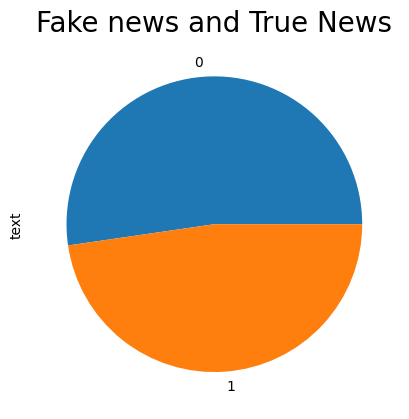

In [5]:
#Pie chart representing the number of fake news and True news datasets
print(data.groupby(['label'])['text'].count())
print("0 = Fake news\n1 = True news")
data.groupby(['label'])['text'].count().plot(kind="pie")
plt.title("Fake news and True News",size=20)
plt.show()

In [6]:
#Shuffle the dataset to make the dataset bias free towards one particular label
data = data.sample(frac=1)
data.head(10)

,text,label
19341,Ownage. pic.twitter.com/yznLKcYiMW Paul Josep...,0
7794,WASHINGTON (Reuters) - Lockheed Martin Corp un...,1
12551,LONDON (Reuters) - British police on Monday sa...,1
463,Donald Trump claimed on Wednesday morning that...,0
14922,BEIRUT (Reuters) - The Syrian Observatory for ...,1
12515,BANGKOK (Reuters) - No trade takes place betwe...,1
14501,BEIRUT (Reuters) - Lebanon s Foreign Minister ...,1
13101,BERLIN (Reuters) - Police raided apartments ac...,1
13473,LONDON (Reuters) - Net migration to Britain fe...,1
2570,WASHINGTON (Reuters) - Long-delayed legislatio...,1


In [7]:
# Function to apply operation on the dataset to clean the unnecessary tokens
def process_word(text):
  text = text.lower()
  text = re.sub ('\[.*?\]','',text)
  text= re.sub("\\W", " ", text)
  text = re.sub('https?://\S+ | www\.\S+','', text)
  text = re.sub ('<.*?>+','', text)
  text = re.sub ('[%s] ' % re.escape(string.punctuation), '', text)
  text = re.sub('\n', '', text)
  text = re.sub('\ w*\d\w*', '', text)
  return text

<>:4: SyntaxWarning: invalid escape sequence '\['
<>:6: SyntaxWarning: invalid escape sequence '\S'
<>:10: SyntaxWarning: invalid escape sequence '\ '
<>:4: SyntaxWarning: invalid escape sequence '\['
<>:6: SyntaxWarning: invalid escape sequence '\S'
<>:10: SyntaxWarning: invalid escape sequence '\ '
C:\Users\baran\AppData\Local\Temp\ipykernel_14348\2471521144.py:4: SyntaxWarning: invalid escape sequence '\['
  text = re.sub ('\[.*?\]','',text)
C:\Users\baran\AppData\Local\Temp\ipykernel_14348\2471521144.py:6: SyntaxWarning: invalid escape sequence '\S'
  text = re.sub('https?://\S+ | www\.\S+','', text)
C:\Users\baran\AppData\Local\Temp\ipykernel_14348\2471521144.py:10: SyntaxWarning: invalid escape sequence '\ '
  text = re.sub('\ w*\d\w*', '', text)


In [8]:
data["text"] = data["text"].apply(process_word)

In [9]:
data

,text,label
19341,ownage pic twitter com yznlkcyimw paul josep...,0
7794,washington reuters lockheed martin corp un...,1
12551,london reuters british police on monday sa...,1
463,donald trump claimed on wednesday morning that...,0
14922,beirut reuters the syrian observatory for ...,1
...,...,...
8955,as president obama rolls out executive orders ...,0
11015,this is a shocker richard dreyfuss was on tuc...,0
10297,you just can t make this stuff up does anyone...,0
9960,two days ago cher a leftist agitator and tr...,0


In [10]:
#Checking if any NULL value
data.isnull().sum()

text     0
label    0
dtype: int64

In [11]:
#Removing the NULL values (if any)
data = data.fillna(' ')

In [12]:
x = data['text']
y = data['label']

#Splitting the datasets for training and evaluation.
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size= 0.2, stratify=y, random_state=2)

In [13]:
from sklearn. feature_extraction.text import TfidfVectorizer

# Creating the TF-IFD Vectorizer to convert the strings and words into their respective weight vectors.
vec = TfidfVectorizer()
xv_train = vec.fit_transform(x_train)
xv_test = vec. transform(x_test)

In [14]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Using Random Forest to classify the dataset on the basis of True and Fake
RF = RandomForestClassifier(random_state=0)
RF.fit(xv_train, y_train)
train_accuracy = RF.score(xv_train, y_train)
print("Training Accuracy:", train_accuracy)

Training Accuracy: 0.9999721588061696


In [15]:
# Running the Evaluation
pred_y = RF.predict(xv_test)

In [16]:
# Classification Report
print(classification_report(y_test, pred_y))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      4696
           1       0.99      0.99      0.99      4284

    accuracy                           0.99      8980
   macro avg       0.99      0.99      0.99      8980
weighted avg       0.99      0.99      0.99      8980



[[4657   39]
 [  54 4230]]


<Axes: >

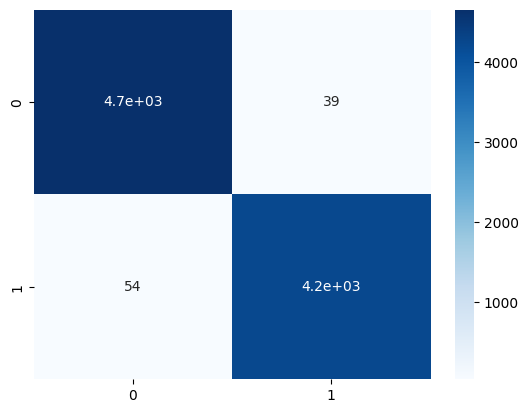

In [17]:
from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sns

# Creating the Confusion matrix for the evaluation
cm = confusion_matrix(y_test, pred_y)
print(cm)

sns.heatmap(cm, cmap="Blues", annot=True)

In [18]:
# Function for predicting Label
def prediction_label(classification):
    if classification == 0:
        return "FAKE News"

    elif classification == 1:
        return "TRUE News"
    else:
        return "Unknown"


# Function for predicting the input news
def predict_news(news_article):
    news = {"text": [news_article]}
    news = pd.DataFrame(news)
    news["text"] = news["text"].apply(process_word)
    test_news = news["text"]

    vec_news = vec.transform(test_news)

    pred_y = RF.predict(vec_news)


    RF_classification = pred_y[0]

    prediction_result = prediction_label(RF_classification)
    return f"Prediction Result: {prediction_result}"


In [22]:
# User Input
# Enter the complete news information.
user_input = input("Enter your news article: ")
predict_news(user_input)

'Prediction Result: TRUE News'

In [ ]:
# TRY OUT YOURSELF


# ***FAKE NEWS***

# Title: New Study Claims Eating Chocolate Every Day Can Extend Lifespan by 10 Years
# Text:
# A new study published in a prestigious medical journal suggests that consuming chocolate daily can extend lifespan by up to 10 years. Researchers claim that compounds found in chocolate have anti-aging properties that can reduce the risk of heart disease, stroke, and even cancer. The study, conducted over 10 years with thousands of participants, purportedly found that those who ate chocolate daily lived significantly longer and had fewer health issues compared to those who did not. Health experts caution that while chocolate can be enjoyed in moderation, such extravagant claims should be approached with skepticism and verified through rigorous scientific research.

# Title: Apple to Release Mind-Reading iPhone Next Year
# Text:
# In an unprecedented technological breakthrough, Apple has announced plans to release a mind-reading iPhone next year. The new device, dubbed the iPhone 15X, is said to feature advanced neural sensors that can interpret users' thoughts and convert them into actions on the phone. This revolutionary technology will allow users to compose messages, browse the internet, and control apps simply by thinking about what they want to do. Apple's CEO Tim Cook claimed that the mind-reading capability will transform the way people interact with technology, making traditional touchscreens obsolete. While the announcement has generated immense excitement, experts have raised concerns about privacy and the potential for misuse of such a powerful tool.


#######################################################################################################################################

# ***TRUE NEWS****

# Title: United Nations Report Finds Global Hunger on the Rise Due to Economic Challenges and Conflicts
# Text:
# A recent report by the United Nations has highlighted a concerning trend of increasing global hunger, exacerbated by economic challenges and conflicts in various regions. According to the report, an estimated 811 million people worldwide faced chronic food deprivation in 2021, up from 783 million in the previous year. The COVID-19 pandemic has further exacerbated food insecurity, with disruptions to food supply chains and economic downturns impacting vulnerable populations. The report calls for urgent international cooperation and support to address the root causes of hunger, including poverty alleviation, conflict resolution, and sustainable development initiatives.



# Title: Global Agreement Reached to Protect Ocean Biodiversity
# Text:
# After years of negotiations, over 190 countries have reached a landmark agreement to protect ocean biodiversity. The treaty, known as the High Seas Biodiversity Treaty, aims to establish marine protected areas, regulate fishing practices, and promote the sustainable use of ocean resources. The agreement is part of broader efforts to combat the negative impacts of climate change, overfishing, and pollution on marine ecosystems. Conservationists have hailed the treaty as a significant step forward in preserving the health of the world's oceans and ensuring the survival of countless marine species. The treaty will be implemented through coordinated efforts at both national and international levels, with regular assessments to monitor progress.




